[44.58237026647799, 66.89612027758182, 36.5751229727596, 1.2830520354387729, 0.0, 0.0]
[41.86746987951807 51.307189542483655 39.03508771929825 46.11973392461197]


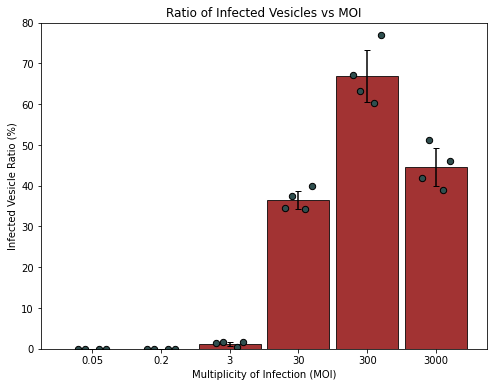

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'serial-dil-count.xlsx'
gfp_data = pd.read_excel(file_path, sheet_name='gfp', header=None)
mc_data = pd.read_excel(file_path, sheet_name='mc', header=None)

# Set phage amounts corresponding to each sample
phage_counts = [10000000, 1000000, 100000, 10000, 1000, 100]  # for samples 1 to 6

# Initialize lists to store mean and std values for ratios and MOI
mean_ratios = []
std_ratios = []
mean_mois = []
std_mois = []
RATIOS=[]
# Process each sample (s1 to s6, corresponding to columns)
for sample in range(6):
    # Extract total vesicle counts and infected vesicle counts for each replicate
    total_vesicles = gfp_data.iloc[1, sample*4:(sample+1)*4].values
    #print(total_vesicles)
    infected_vesicles = mc_data.iloc[1, sample*4:(sample+1)*4].values

    # Calculate ratio of infected vesicles for each replicate
    ratios = (infected_vesicles / total_vesicles) * 100  # convert to percentage
    #print(ratios)

    # Calculate MOI for each replicate
    mois = phage_counts[sample] / (total_vesicles * 12)

    # Store mean and std for ratios and MOI
    mean_ratios.append(np.mean(ratios))
    std_ratios.append(np.std(ratios))
    mean_mois.append(np.mean(mois))
    std_mois.append(np.std(mois))
    RATIOS.append(ratios)

    
print(mean_ratios)
lal=len(mean_ratios)
mean_ratios2=[mean_ratios[-i] for i in range(1, len(mean_ratios)+1)]
#print(mean_ratios[-0])
#print(mean_ratios2)
std_ratios2=[std_ratios[-i] for i in range(1, len(std_ratios)+1)]


#print(RATIOS[0])
X=[]
Y=[]
width = 0.9

for i in range(len(phage_counts)):
    X.append([i-0.2, i-0.1, i+0.1, i+0.2])
    Y.append(i)

Y= np.array(Y)
X = np.array(X)

R = np.array(RATIOS)
print(R[0])
R2=np.array([R[-k] for k in range(1, len(R)+1)])


#print(int(mean_mois[k]) for k in mean_mois)

#Transform MOI values into labels
mois=['{:.2f}'.format(x) for x in mean_mois]
MOI= ['0.05', '0.2', '3', '30', '300', '3000']
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Define positions for bars and scatter points
x_positions = np.arange(len(phage_counts))

# Create bar plot for the means with standard deviation error bars
#plt.bar(x_positions, mean_ratios, yerr=std_ratios, capsize=5, alpha=0.6, label='Mean ± SD', color='red')
rects1 = ax.bar(x_positions, mean_ratios2, width, yerr=std_ratios2, color= 'darkred', alpha=0.8, capsize = 3, edgecolor='0')
#rects1 = ax.bar(x - width/2, MEAN_l, width, yerr = STD_l, label=condition[0], color= color, alpha=0.8, capsize = 3, edgecolor='0')

#Add the individual points
for i in range(len(phage_counts)):
            ax.scatter(X[i], R2[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='darkslategray', edgecolors='0')



plt.xlabel('Multiplicity of Infection (MOI)')
#plt.xticks(x_positions, mois, rotation=45)
plt.xticks(x_positions, MOI)
plt.ylabel('Infected Vesicle Ratio (%)')
plt.title('Ratio of Infected Vesicles vs MOI')
plt.ylim(0, 80)  # y-axis between 0 and 100
#plt.savefig('ratio-moi.svg', format='svg') #Save the figure
plt.show()